In [1]:
# Importing the neccessary libraries

import numpy as np
import matplotlib.pyplot as plt

from math import sin, cos, exp, pi

C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Functions

In [2]:
# Function for plotting the rectangle

def rect_plot(x_coordinates, y_coordinates):

    plt.figure(figsize = (6,6))
    plt.plot(x_coordinates, y_coordinates, color = 'firebrick', label = 'rectangle')

    plt.title('The generated rectangle with width = ' + str(w) + ', height = ' + str(h), fontsize = 16)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)

    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

In [12]:
# Function for generating the circumference of the rectangle

def rect_circ(width, height, devision_point):
    
    # Creating lists to save the coordinates
    x_filled = []
    y_filled = []

    # Generating the coordinates
    x_lower_upper = list(np.array(range(int(-width/2*100), int(width/2*100)))/100)
    y_lower = [-height/2]*len(x_lower_upper)
    y_upper = [height/2]*len(x_lower_upper)

    y_left_right = list(np.array(range(int(-h/2*100), int(h/2*100)))/100)
    x_left = [-width/2]*len(y_left_right)
    x_right = [width/2]*len(y_left_right)
    
    # Filling up the lower 1/3 of the rectangle
    for i in range(0,int(len(y_left_right) * devision_point)):
        #appending the x and y coordinates
        x_filled += x_lower_upper
        y_filled += [y_left_right[i]]*len(x_lower_upper)
        
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):        
        temp = x_lower_upper[int(len(x_lower_upper)/10*0):int(len(x_lower_upper)/10*2)]      
        x_filled += temp
        y_filled += [y_left_right[i]]*len(temp)        
        
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):
        temp = x_lower_upper[int(len(x_lower_upper)/10*4):int(len(x_lower_upper)/10*6)]
        x_filled += temp
        y_filled += [y_left_right[i]]*len(temp)
        
    for i in range(int(len(y_left_right) * devision_point), len(y_left_right)):
        temp = x_lower_upper[int(len(x_lower_upper)/10*8):int(len(x_lower_upper)/10*10)]
        x_filled += temp
        y_filled += [y_left_right[i]]*len(temp)
        
    # Returning with the coordinates
    return [x_filled, y_filled]

## Generating the rectangle

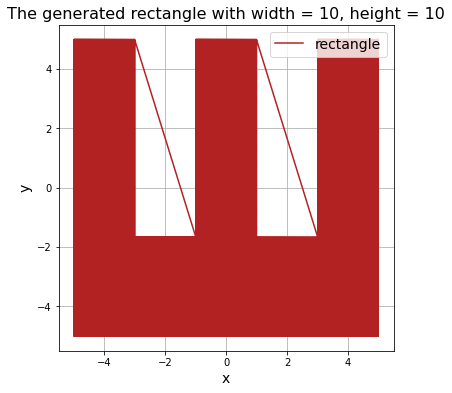

In [14]:
# Setting the width and height

w = 10
h = 10

# Setting the division point - the amount of full rectangle

devision_point = 1/3

# Generating the circumference of the rectangle

x_y_coord = rect_circ(w, h, devision_point)
x_coordinates = x_y_coord[0]
y_coordinates = x_y_coord[1]

# Plotting the rectangle

rect_plot(x_coordinates, y_coordinates)